In [1]:
import os, sys


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from debias_graph import debias_wrapper

In [3]:
dataset = "polbook"
# group values for each node
y = pd.read_csv("../../final_128/{}/node_table.csv".format(dataset)).group_id.values
y

array([2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

In [4]:
def plot_embs(emb, y, pallete=sns.color_palette("colorblind",), method='PCA'):
    n = y.shape[0]
    if method == "PCA":
        xy = PCA(n_components=2).fit_transform(emb)
    else:
        pass
    
    df = pd.DataFrame({
        "x": xy[:, 0],
        "y": xy[:,1],
        "hue": y,
    })
    sns.scatterplot(df, x="x", y="y", hue="hue", palette=pallete )

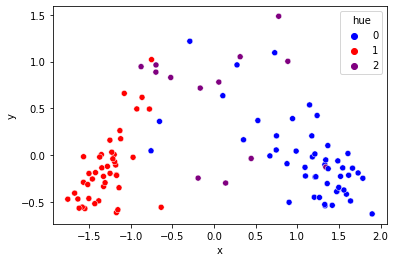

In [5]:
# load 
colors = {0: "blue", 1: "red", 2: "purple"}
embs = np.load("../../final_128/{}/{}_one/{}_deepwalk.npy".format(dataset, dataset, dataset))
plot_embs(embs, y, colors)

In [7]:
# definitional words, in this case are the centroids of the groups

def get_centroids(emb, groups):
    n = len(groups)
    uy, y = np.unique(groups, return_inverse=True)
    K = len(uy) # number of classes
    centroids = np.zeros((K, emb.shape[1]))
    for k in range(K):
        centroids[k] = embs[y == k].mean(axis=0)
    return centroids

definitional = get_centroids(embs, y)

In [8]:
# gender specific nodes, these are used to figure out which nodes should be normalized, 
# in paper "nuetralization", in our case picking ones which have 



(3, 128)